In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
from matplotlib.patches import Ellipse
warnings.filterwarnings("ignore")

# plot setting
plt.rcParams['font.family']='Arial'

bar_width=0.25
plt.rc('axes', labelsize=11)
plt.rc('xtick', labelsize=8) 
plt.rc('ytick', labelsize=8) 
plt.rc('legend', fontsize=8)
plt.rc('figure', titlesize=10) 
title_size = 18
label_size = 14
point_alpha = 0.8

color_vs = ['#E881A6', '#6EA1D4']
color_year2 = ['#FFBE98', '#FFA74F', '#E881A6', '#60C8B3', '#6EA1D4']
color_year = ['#EFCFBA', '#FFB2A5', '#FA9A85',  '#DE8286', '#F97272']

set_dpi=300

In [2]:
figure_path = '../Figures/'
gpd_file_path = '../Data/'
gpd_file_name = 'sig_5179.shp'
loc_file_name = 'ASF_WildBoar_Update.csv'

location = pd.read_csv(gpd_file_path + loc_file_name)
korea = gpd.read_file(gpd_file_path + gpd_file_name)

korea = korea.to_crs(epsg=4326)

# error correction
location.loc[location['경도'].str[-2] == '.','경도'] = 128.3489
location['위도'] = location['위도'].str.replace(',', '')
location['경도'] = location['경도'].astype(float)
location['위도'] = location['위도'].astype(float)

location['확진'] = pd.to_datetime(location['확진'], format = '%Y-%m-%d')
location = location.rename(columns = {'위도' : 'y', '경도' : 'x'}, inplace  = False)

# Year
location_2019 = location.query('확진 < "2020-01-01"')
location_2020 = location.query('확진 >= "2020-01-01" & 확진 < "2021-01-01"')
location_2021 = location.query('확진 >= "2021-01-01" & 확진 < "2022-01-01"')
location_2022 = location.query('확진 >= "2022-01-01" & 확진 < "2023-01-01"')
location_2023 = location.query('확진 >= "2023-01-01" & 확진 < "2024-01-01"')

# 상하반기 구분
location_2019_2 = location_2019.query('확진 < "2020-01-01" & 확진 >= "2019-07-01"')
location_2020_1 = location_2020.query('확진 < "2020-07-01" & 확진 >= "2020-01-01"')
location_2020_2 = location_2020.query('확진 < "2021-01-01" & 확진 >= "2020-07-01"')
location_2021_1 = location_2021.query('확진 < "2021-07-01" & 확진 >= "2021-01-01"')
location_2021_2 = location_2021.query('확진 < "2022-01-01" & 확진 >= "2021-07-01"')
location_2022_1 = location_2022.query('확진 < "2022-07-01" & 확진 >= "2022-01-01"')
location_2022_2 = location_2022.query('확진 < "2023-01-01" & 확진 >= "2022-07-01"')
location_2023_1 = location_2023.query('확진 < "2023-07-01" & 확진 >= "2023-01-01"')

## 감시강도에 따른 Y조정하기

- 우선, 표준편차에 따른 SDE 타원을 가져오고 나누어진 각 공간에 대해서 감시강도 1,2,3을 부여한다.
- SDE는 연도별로 되어있는데 더 세밀한 조정을 위해서는 6개월 단위로 SDE 타원을 그려서 감시강도를 지역별로 6개월마다 변하도록 설정해야한다.

In [3]:
def cal_mean_cov(data):
    x = data['x']
    y = data['y']

    mean_x = np.mean(x)
    mean_y = np.mean(y)
    mean_values = np.array([mean_x, mean_y])

    cov_values = np.cov(x, y)

    return mean_values, cov_values

mean_2019_2, cov_2019_2 = cal_mean_cov(location_2019_2)
mean_2020_1, cov_2020_1 = cal_mean_cov(location_2020_1)
mean_2020_2, cov_2020_2 = cal_mean_cov(location_2020_2)
mean_2021_1, cov_2021_1 = cal_mean_cov(location_2021_1)
mean_2021_2, cov_2021_2 = cal_mean_cov(location_2021_2)
mean_2022_1, cov_2022_1 = cal_mean_cov(location_2022_1)
mean_2022_2, cov_2022_2 = cal_mean_cov(location_2022_2)
mean_2023_1, cov_2023_1 = cal_mean_cov(location_2023_1)

In [4]:
# def Make_ellipse(mean, cov, color):
#     elp = Ellipse(xy = mean, width = np.sqrt(cov[0,0]) * 2,
#                 height = np.sqrt(cov[1,1]) * 2,
#                 angle = np.rad2deg(np.arccos(cov[0,1] / np.sqrt(cov[0,0] * cov[1,1]))),
#                 edgecolor = 'black', facecolor = color, alpha = 0.5, linewidth = 0.7)
#     return elp



# ellipse_2019_2 = Make_ellipse(mean_2019_2, cov_2019_2, color_year[0])
# ellipse_2020_1 = Make_ellipse(mean_2020_1, cov_2020_1, color_year[1])
# ellipse_2020_2 = Make_ellipse(mean_2020_2, cov_2020_2, color_year[2])
# ellipse_2021_1 = Make_ellipse(mean_2021_1, cov_2021_1, color_year[3])
# ellipse_2021_2 = Make_ellipse(mean_2021_2, cov_2021_2, color_year[4])
# ellipse_2022_1 = Make_ellipse(mean_2022_1, cov_2022_1, color_year2[0])
# ellipse_2022_2 = Make_ellipse(mean_2022_2, cov_2022_2, color_year2[1])
# ellipse_2023_1 = Make_ellipse(mean_2023_1, cov_2023_1, color_year2[2])

In [49]:
def confidence_ellipse_1(data, n_std, facecolor='none', **kwargs):
    import matplotlib.transforms as transforms
    x = data['x']
    y = data['y']

    if x.size != y.size:
        raise ValueError("x and y must be the same size")

    cov = np.cov(x, y)
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    # Using a special case to obtain the eigenvalues of this
    # two-dimensional dataset.
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0), width=ell_radius_x * 2, height=ell_radius_y * 2,
                      facecolor=facecolor, edgecolor = 'black', **kwargs, alpha = 0.3, linewidth = 0.7)

    # Calculating the standard deviation of x from
    # the squareroot of the variance and multiplying
    # with the given number of standard deviations.
    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = np.mean(x)

    # calculating the standard deviation of y ...
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = np.mean(y)

    angle = 45
    transf = transforms.Affine2D() \
        .rotate_deg(angle) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)

    ellipse.set_transform(transf)
    return ellipse

def confidence_ellipse_2023(data, n_std, facecolor='none', **kwargs):
    import matplotlib.transforms as transforms
    x = data['x']
    y = data['y']

    if x.size != y.size:
        raise ValueError("x and y must be the same size")

    cov = np.cov(x, y)
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    # Using a special case to obtain the eigenvalues of this
    # two-dimensional dataset.
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0), width=ell_radius_x * 2, height=ell_radius_y * 2,
                      facecolor=facecolor, edgecolor = 'black', **kwargs, alpha = 0.3, linewidth = 0.7)

    # Calculating the standard deviation of x from
    # the squareroot of the variance and multiplying
    # with the given number of standard deviations.
    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = np.mean(x)

    # calculating the standard deviation of y ...
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = np.mean(y)

    angle = 0
    transf = transforms.Affine2D() \
        .rotate_deg(angle) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)

    ellipse.set_transform(transf)
    return ellipse

def confidence_ellipse(x, y, ax, n_std=2.0, facecolor='none', edgecolor='black', edge_alpha=1.0, **kwargs):
    if x.size != y.size:
        raise ValueError("x and y must be the same size")
    
    cov = np.cov(x, y)
    pearson = cov[0, 1] / np.sqrt(cov[0, 0] * cov[1, 1])
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0), width=ell_radius_x * 2, height=ell_radius_y * 2,
                      facecolor=facecolor, edgecolor=edgecolor, alpha=0.3, linewidth=1, **kwargs)
    
    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = np.mean(x)
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = np.mean(y)
    
    transf = transforms.Affine2D() \
        .rotate_deg(ellipse.angle) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)
    
    ellipse.set_transform(transf + ax.transData)
    
    if edgecolor != 'none':
        edge_patch = Ellipse((0, 0), width=ell_radius_x * 2, height=ell_radius_y * 2,
                             facecolor='none', edgecolor=edgecolor, alpha=edge_alpha, linewidth=1, **kwargs)
        edge_patch.set_transform(transf + ax.transData)
        ax.add_patch(edge_patch)
    
    return ax.add_patch(ellipse)

# 오류있음 지금
# surveillance area with std = 1.0 
ellipse_2019_2_1 = confidence_ellipse_1(location_2019_2, n_std = 1, facecolor = color_year[0])
ellipse_2020_1_1 = confidence_ellipse_1(location_2020_1, n_std = 1, facecolor = color_year[1])
ellipse_2020_2_1 = confidence_ellipse_1(location_2020_2, n_std = 1, facecolor = color_year[2])
ellipse_2021_1_1 = confidence_ellipse_1(location_2021_1, n_std = 1, facecolor = color_year[3])
ellipse_2021_2_1 = confidence_ellipse_1(location_2021_2, n_std = 1, facecolor = color_year[4])
ellipse_2022_1_1 = confidence_ellipse_2023(location_2022_1, n_std = 1, facecolor = color_year2[0])
ellipse_2022_2_1 = confidence_ellipse_2023(location_2022_2, n_std = 1, facecolor = color_year2[1])
ellipse_2023_1_1 = confidence_ellipse_2023(location_2023_1, n_std = 1, facecolor = color_year2[2])

# surveillance area with std = 2.0
ellipse_2019_2_2 = confidence_ellipse_1(location_2019_2, n_std = 2.0, facecolor = color_year[0])
ellipse_2020_1_2 = confidence_ellipse_1(location_2020_1, n_std = 2.0, facecolor = color_year[1])
ellipse_2020_2_2 = confidence_ellipse_1(location_2020_2, n_std = 2.0, facecolor = color_year[2])
ellipse_2021_1_2 = confidence_ellipse_1(location_2021_1, n_std = 2.0, facecolor = color_year[3])
ellipse_2021_2_2 = confidence_ellipse_1(location_2021_2, n_std = 2.0, facecolor = color_year[4])
ellipse_2022_1_2 = confidence_ellipse_2023(location_2022_1, n_std = 2.0, facecolor = color_year2[0])
ellipse_2022_2_2 = confidence_ellipse_2023(location_2022_2, n_std = 2.0, facecolor = color_year2[1])
ellipse_2023_1_2 = confidence_ellipse_2023(location_2023_1, n_std = 2.0, facecolor = color_year2[2])

# surveillance area with std = 3.0
ellipse_2019_2_3 = confidence_ellipse_1(location_2019_2, n_std = 3.0, facecolor = color_year[0])
ellipse_2020_1_3 = confidence_ellipse_1(location_2020_1, n_std = 3.0, facecolor = color_year[1])
ellipse_2020_2_3 = confidence_ellipse_1(location_2020_2, n_std = 3.0, facecolor = color_year[2])
ellipse_2021_1_3 = confidence_ellipse_1(location_2021_1, n_std = 3.0, facecolor = color_year[3])
ellipse_2021_2_3 = confidence_ellipse_1(location_2021_2, n_std = 3.0, facecolor = color_year[4])
ellipse_2022_1_3 = confidence_ellipse_2023(location_2022_1, n_std = 3.0, facecolor = color_year2[0])
ellipse_2022_2_3 = confidence_ellipse_2023(location_2022_2, n_std = 3.0, facecolor = color_year2[1])
ellipse_2023_1_3 = confidence_ellipse_2023(location_2023_1, n_std = 3.0, facecolor = color_year2[2])


In [44]:
from matplotlib.transforms import Affine2D
import numpy as np

transf = ellipse_2023_1_2.get_transform()
width_point = transf.transform_point((ellipse_2023_1_2.width / 2, 0))
height_point = transf.transform_point((0, ellipse_2023_1_2.height / 2))
center = transf.transform_point(ellipse_2023_1_2.center)

transformed_width = 2 * np.sqrt((width_point[0] - center[0]) ** 2 + (width_point[1] - center[1]) ** 2)
transformed_height = 2 * np.sqrt((height_point[0] - center[0]) ** 2 + (height_point[1] - center[1]) ** 2)

print(f"Transformed Width: {transformed_width}")
print(f"Transformed Height: {transformed_height}")

Transformed Width: 1.8060766135501467
Transformed Height: 1.0375766248785254


In [50]:
import numpy as np
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms


def is_point_in_ellipse(x, y, ellipse):
    transf = ellipse.get_transform()
    width_point = transf.transform_point((ellipse.width / 2, 0))
    height_point = transf.transform_point((0, ellipse.height / 2))
    center = transf.transform_point(ellipse.center)

    transformed_width = np.sqrt((width_point[0] - center[0]) ** 2 + (width_point[1] - center[1]) ** 2)
    transformed_height = np.sqrt((height_point[0] - center[0]) ** 2 + (height_point[1] - center[1]) ** 2)

    h, k = center
    a = transformed_width
    b = transformed_height
    angle = np.deg2rad(ellipse.angle)  # 타원의 회전 각도

    # 점을 타원의 중심을 기준으로 회전
    cos_angle = np.cos(angle)
    sin_angle = np.sin(angle)

    dx = x - h
    dy = y - k

    # 점을 45도 회전 변환
    rotated_x = cos_angle * dx + sin_angle * dy
    rotated_y = -sin_angle * dx + cos_angle * dy

    # 타원의 방정식
    return 1 if (rotated_x ** 2 / a ** 2 + rotated_y ** 2 / b ** 2) <= 1 else 0



In [51]:
print(korea.apply(lambda row: is_point_in_ellipse(row['x'], row['y'], ellipse_2019_2_1), axis=1).sum(),
korea.apply(lambda row: is_point_in_ellipse(row['x'], row['y'], ellipse_2019_2_2), axis=1).sum(),
korea.apply(lambda row: is_point_in_ellipse(row['x'], row['y'], ellipse_2019_2_3), axis=1).sum())

1 2 2


In [55]:
# 2019-2에서의 지역별 감시강도 지정
a = korea.apply(lambda row: is_point_in_ellipse(row['x'], row['y'], ellipse_2019_2_1), axis=1)
b = korea.apply(lambda row: is_point_in_ellipse(row['x'], row['y'], ellipse_2019_2_2), axis=1)
c = korea.apply(lambda row: is_point_in_ellipse(row['x'], row['y'], ellipse_2019_2_3), axis=1)
korea['2019_2'] = a+b+c

# 2020-1에서의 지역별 감시강도 지정
a = korea.apply(lambda row: is_point_in_ellipse(row['x'], row['y'], ellipse_2020_1_1), axis=1)
b = korea.apply(lambda row: is_point_in_ellipse(row['x'], row['y'], ellipse_2020_1_2), axis=1)
c = korea.apply(lambda row: is_point_in_ellipse(row['x'], row['y'], ellipse_2020_1_3), axis=1)
korea['2020_1'] = a+b+c

# 2020-2에서의 지역별 감시강도 지정
a = korea.apply(lambda row: is_point_in_ellipse(row['x'], row['y'], ellipse_2020_2_1), axis=1)
b = korea.apply(lambda row: is_point_in_ellipse(row['x'], row['y'], ellipse_2020_2_2), axis=1)
c = korea.apply(lambda row: is_point_in_ellipse(row['x'], row['y'], ellipse_2020_2_3), axis=1)
korea['2020_2'] = a+b+c

# 2021-1에서의 지역별 감시강도 지정
a = korea.apply(lambda row: is_point_in_ellipse(row['x'], row['y'], ellipse_2021_1_1), axis=1)
b = korea.apply(lambda row: is_point_in_ellipse(row['x'], row['y'], ellipse_2021_1_2), axis=1)
c = korea.apply(lambda row: is_point_in_ellipse(row['x'], row['y'], ellipse_2021_1_3), axis=1)
korea['2021_1'] = a+b+c

# 2021-2에서의 지역별 감시강도 지정
a = korea.apply(lambda row: is_point_in_ellipse(row['x'], row['y'], ellipse_2021_2_1), axis=1)
b = korea.apply(lambda row: is_point_in_ellipse(row['x'], row['y'], ellipse_2021_2_2), axis=1)
c = korea.apply(lambda row: is_point_in_ellipse(row['x'], row['y'], ellipse_2021_2_3), axis=1)
korea['2021_2'] = a+b+c

# 2022-1에서의 지역별 감시강도 지정
a = korea.apply(lambda row: is_point_in_ellipse(row['x'], row['y'], ellipse_2022_1_1), axis=1)
b = korea.apply(lambda row: is_point_in_ellipse(row['x'], row['y'], ellipse_2022_1_2), axis=1)
c = korea.apply(lambda row: is_point_in_ellipse(row['x'], row['y'], ellipse_2022_1_3), axis=1)
korea['2022_1'] = a+b+c

# 2022-2에서의 지역별 감시강도 지정
a = korea.apply(lambda row: is_point_in_ellipse(row['x'], row['y'], ellipse_2022_2_1), axis=1)
b = korea.apply(lambda row: is_point_in_ellipse(row['x'], row['y'], ellipse_2022_2_2), axis=1)
c = korea.apply(lambda row: is_point_in_ellipse(row['x'], row['y'], ellipse_2022_2_3), axis=1)
korea['2022_2'] = a+b+c

# 2023-1에서의 지역별 감시강도 지정
a = korea.apply(lambda row: is_point_in_ellipse(row['x'], row['y'], ellipse_2023_1_1), axis=1)
b = korea.apply(lambda row: is_point_in_ellipse(row['x'], row['y'], ellipse_2023_1_2), axis=1)
c = korea.apply(lambda row: is_point_in_ellipse(row['x'], row['y'], ellipse_2023_1_3), axis=1)
korea['2023_1'] = a+b+c

korea.to_file(gpd_file_path + 'korea_with_surveillance2.shp')

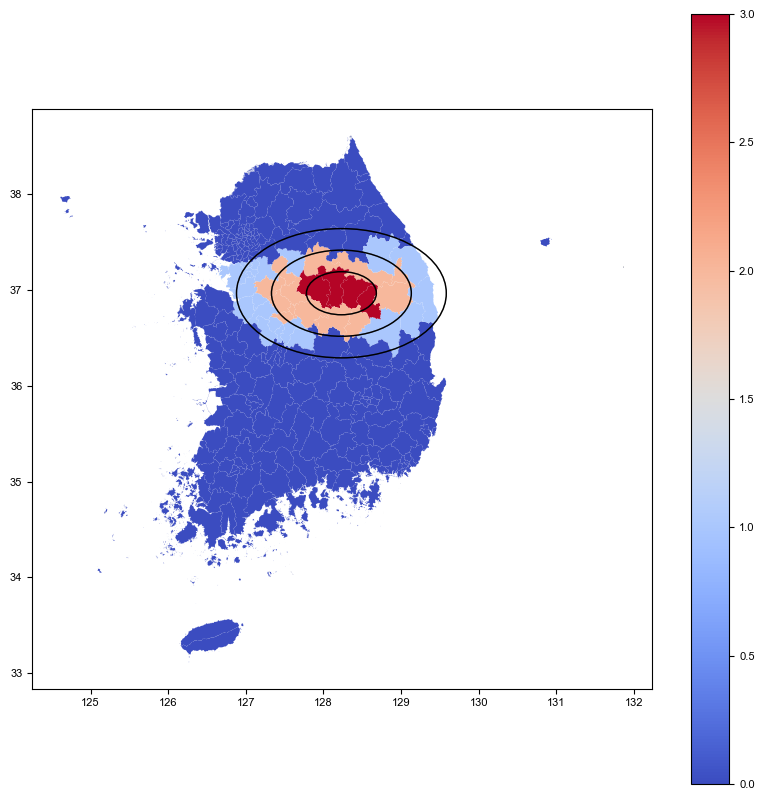

In [54]:
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms

korea.plot(column='2022_2', cmap='coolwarm', legend=True, figsize=(10, 10))
confidence_ellipse(location_2022_2['x'], location_2022_2['y'], plt.gca(), n_std=1.0, edgecolor='black')
confidence_ellipse(location_2022_2['x'], location_2022_2['y'], plt.gca(), n_std=2.0, edgecolor='black')
confidence_ellipse(location_2022_2['x'], location_2022_2['y'], plt.gca(), n_std=3.0, edgecolor='black')


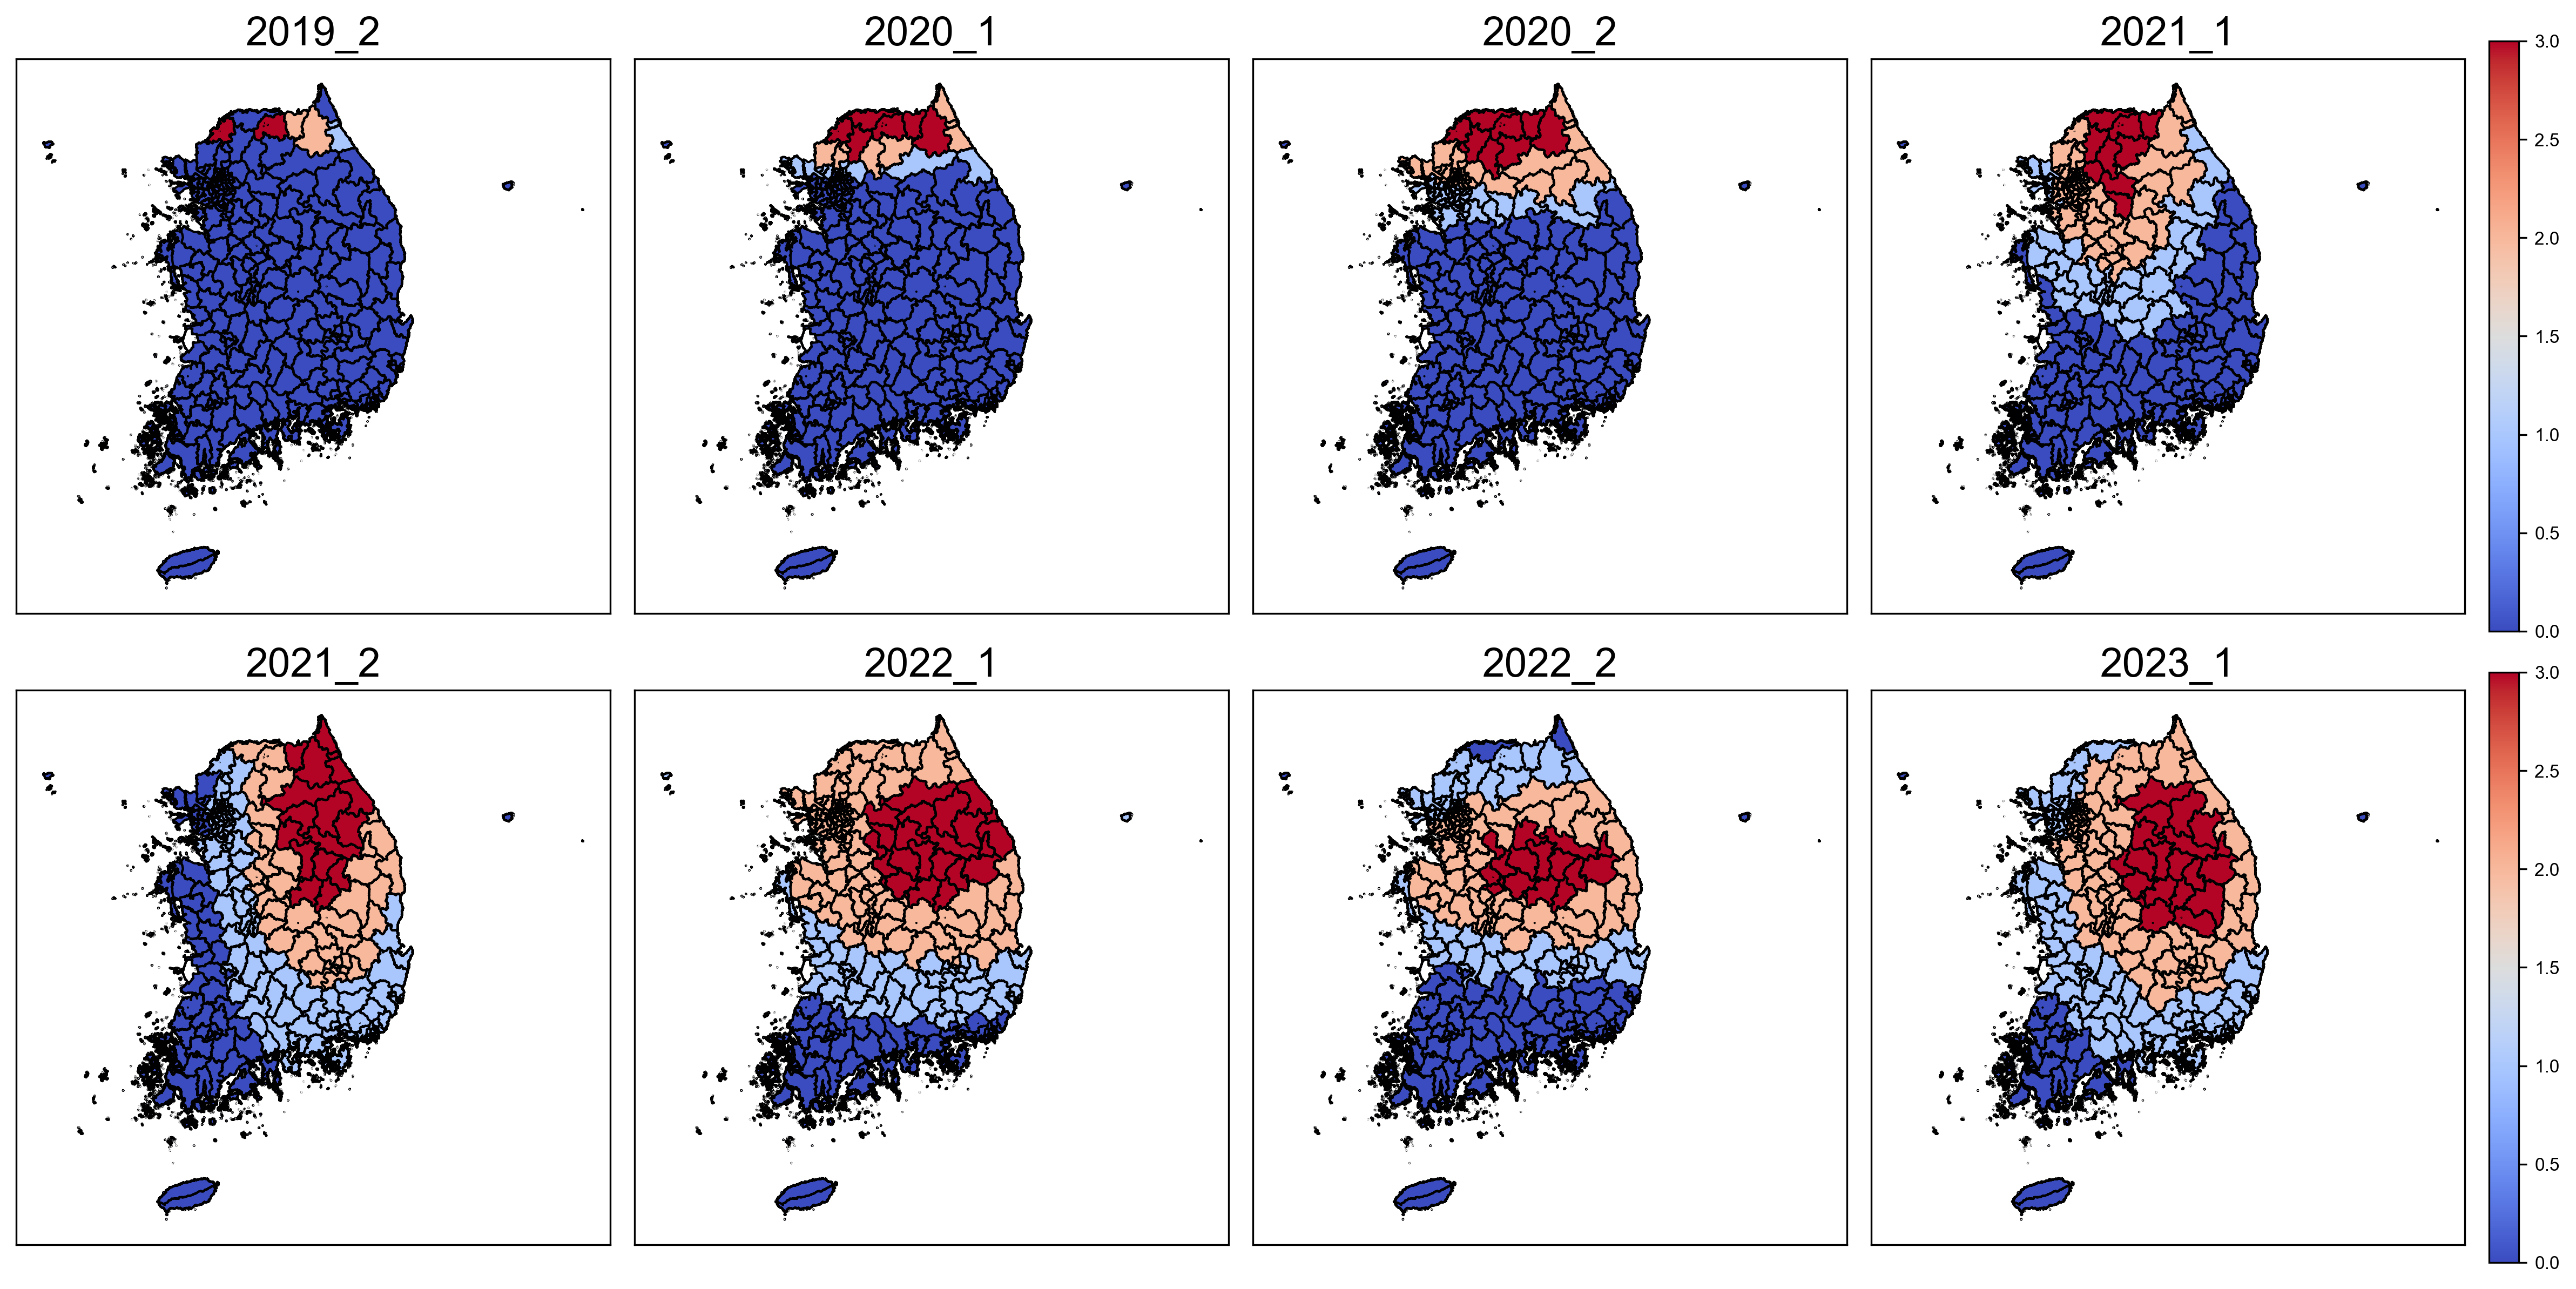

In [17]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

year_lst = ['2019_2', '2020_1', '2020_2', '2021_1', '2021_2', '2022_1', '2022_2', '2023_1']

fig = plt.figure(figsize=(16, 8), dpi=set_dpi)

gs = gridspec.GridSpec(2, 5, width_ratios=[1, 1, 1, 1, 0.05])  # 0.05 for the width of colorbar
ax = [plt.subplot(gs[i, j]) for i in range(2) for j in range(4)]
cax = [plt.subplot(gs[i, 4]) for i in range(2)]  # colorbar axes

for i, year in enumerate(year_lst):
    im = korea.plot(column=year, cmap='coolwarm', legend=False, ax=ax[i], edgecolor = 'black')
    ax[i].set_title(year, fontsize=title_size)
    ax[i].get_xaxis().set_visible(False)
    ax[i].get_yaxis().set_visible(False)
    fig.colorbar(im.collections[0], cax=cax[i//4])

plt.tight_layout()
plt.show()

## Plot


In [41]:
def confidence_ellipse(x, y, ax, n_std=2.0, facecolor='none', **kwargs):
    import matplotlib.transforms as transforms
    if x.size != y.size:
        raise ValueError("x and y must be the same size")

    cov = np.cov(x, y)
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    # Using a special case to obtain the eigenvalues of this
    # two-dimensional dataset.
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0), width=ell_radius_x * 2, height=ell_radius_y * 2,
                      facecolor=facecolor, edgecolor = 'black', **kwargs, alpha = 0.3, linewidth = 0.7)

    # Calculating the standard deviation of x from
    # the squareroot of the variance and multiplying
    # with the given number of standard deviations.
    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = np.mean(x)

    # calculating the standard deviation of y ...
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = np.mean(y)

    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)

    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (12, 8), dpi = set_dpi)
korea.plot(ax = ax, color = 'white', edgecolor = 'black', alpha = 0.6)
ax.scatter(location_2019_2['x'], location_2019_2['y'], s = 1, color = color_year[0], alpha = point_alpha, label = '2019-2')
ax.scatter(location_2020_1['x'], location_2020_1['y'], s = 1, color = color_year[1], alpha = point_alpha, label = '2020-1')
ax.scatter(location_2020_2['x'], location_2020_2['y'], s = 1, color = color_year[2], alpha = point_alpha, label = '2020-2')
ax.scatter(location_2021_1['x'], location_2021_1['y'], s = 1, color = color_year[3], alpha = point_alpha, label = '2021-1')
ax.scatter(location_2021_2['x'], location_2021_2['y'], s = 1, color = color_year[4], alpha = point_alpha, label = '2021-2')
ax.scatter(location_2022_1['x'], location_2022_1['y'], s = 1, color = color_year2[0], alpha = point_alpha, label = '2022-1')
ax.scatter(location_2022_2['x'], location_2022_2['y'], s = 1, color = color_year2[1], alpha = point_alpha, label = '2022-2')
ax.scatter(location_2023_1['x'], location_2023_1['y'], s = 1, color = color_year2[2], alpha = point_alpha, label = '2023-1')

# confidence_ellipse(location_2019['x'], location_2019['y'], ax, n_std=2.0, facecolor=color_year[0])
# confidence_ellipse(location_2020['x'], location_2020['y'], ax, n_std=2.0, facecolor=color_year[1])
# confidence_ellipse(location_2021['x'], location_2021['y'], ax, n_std=2.0, facecolor=color_year[2])
# confidence_ellipse(location_2022['x'], location_2022['y'], ax, n_std=2.0, facecolor=color_year[3])
# confidence_ellipse(location_2023['x'], location_2023['y'], ax, n_std=2.0, facecolor=color_year[4])

confidence_ellipse(location_2019_2['x'], location_2019_2['y'], ax, n_std=2.0, facecolor=color_year[0])
confidence_ellipse(location_2020_1['x'], location_2020_1['y'], ax, n_std=2.0, facecolor=color_year[1])
confidence_ellipse(location_2020_2['x'], location_2020_2['y'], ax, n_std=2.0, facecolor=color_year[2])
confidence_ellipse(location_2021_1['x'], location_2021_1['y'], ax, n_std=2.0, facecolor=color_year[3])
confidence_ellipse(location_2021_2['x'], location_2021_2['y'], ax, n_std=2.0, facecolor=color_year[4])
confidence_ellipse(location_2022_1['x'], location_2022_1['y'], ax, n_std=2.0, facecolor=color_year2[0])
confidence_ellipse(location_2022_2['x'], location_2022_2['y'], ax, n_std=2.0, facecolor=color_year2[1])
confidence_ellipse(location_2023_1['x'], location_2023_1['y'], ax, n_std=2.0, facecolor=color_year2[2])

ax.legend()

ax.set_xticks([])
ax.set_yticks([])
ax.set_xticklabels([])
ax.set_yticklabels([])

ax.set_title('Points of ASFV cases in South Korea', fontsize = title_size)
# plt.savefig(image_path + 'Figure5.tif', dpi = set_dpi, bbox_inches = 'tight')
plt.show()